In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\EastWestAirlines.csv")

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data = data.drop({'Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?'},axis=1)

In [5]:
data.head()

,ID#,Balance,Bonus_miles,Days_since_enroll
0,1,28143,174,7000
1,2,19244,215,6968
2,3,41354,4123,7034
3,4,14776,500,6952
4,5,97752,43300,6935


array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>]], dtype=object)

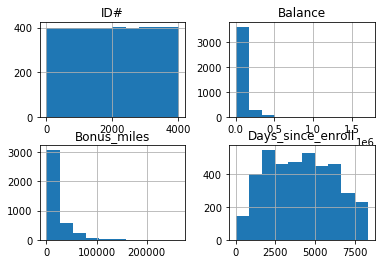

In [6]:
data.hist()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Bonus_miles        3999 non-null   int64
 3   Days_since_enroll  3999 non-null   int64
dtypes: int64(4)
memory usage: 125.1 KB


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(data.iloc[:,:])

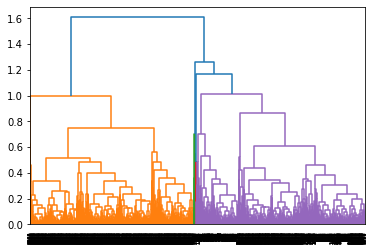

In [10]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [13]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
df_norm['h_clusterid']=Clusters

In [15]:
df_norm.sort_values("h_clusterid")

,ID#,Balance,Bonus_miles,Days_since_enroll,h_clusterid
0,0.000000,0.016508,0.000660,0.843742,0
1369,0.343532,0.026637,0.004172,0.622257,0
1368,0.343284,0.000587,0.000000,0.574753,0
1367,0.343035,0.033028,0.009481,0.564987,0
1366,0.342786,0.009056,0.001858,0.620328,0
...,...,...,...,...,...
275,0.069154,1.000000,0.064880,0.877864,2
87,0.022139,0.357498,0.081241,0.822040,2
117,0.029602,0.568710,0.009481,0.930311,2
43,0.010697,0.363315,0.056916,0.942489,2
